In [5]:
import numpy as np
import matplotlib.pyplot as plt

## Generate bivariate data with a few Gaussians of Different Means and Covariance

C:\Users\brian\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: covariance is not positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\brian\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: covariance is not positive-semidefinite.
  if __name__ == '__main__':


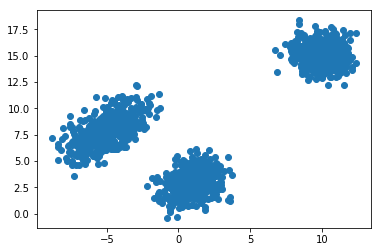

In [6]:
mean1 = [1, 3]
cov1 = [[1,0.5], [0,1]]
g1 = np.random.multivariate_normal(mean1, cov1, 500)
mean2 = [10, 15]
cov2 = [[1,0],[0,1]]
g2 = np.random.multivariate_normal(mean2, cov2, 500)
mean3 = [-5, 8]
cov3 = [[2,1.5],[1,2]]
g3 = np.random.multivariate_normal(mean3, cov3, 500)
data = np.vstack((np.vstack((g1, g2)), g3))
plt.scatter(data[:,0], data[:,1])

## A Fully Vectorized Vanilla Kmean for Bivariate Data
#### Implemented as a baseline to compare with the tensor method

... 0 ... 9.692322157300456
... 1 ... 15.898284213774959
... 2 ... 10.757002512762071
... 3 ... 0.0443003035753371
... 4 ... 0.0
[[-5.0310161   7.98250811]
 [10.02255007 15.0953422 ]
 [ 0.97308482  3.00512148]]


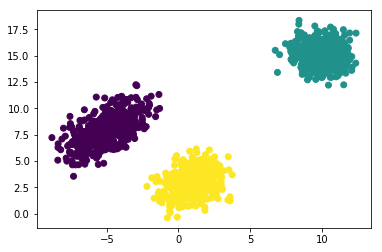

In [7]:
def bivariate_kmean(k, data):
    means = np.random.rand(k, 2) * data.mean(axis=0)
    tolerance = float('inf')
    count = 0
    while tolerance > 0.00001 and count < 100:
        assignments = np.power(np.power(data - means[:,None], 2).sum(axis=2), 0.5).argmin(axis=0)
        mask = assignments == np.linspace(0,k-1,k)[:,None]
        new_means = (data * mask[...,None]).sum(axis=1) / mask.sum(axis=1)[...,None]
        tolerance = np.abs(means - new_means).sum()
        means = new_means
        print ("...", count, "...", tolerance)
        count += 1
    return means, assignments

k = 3
means, assigments = bivariate_kmean(k, data)
print (means)
plt.scatter(data[:,0], data[:,1], c=assigments)